In [1]:
import geopandas as geopd
import matplotlib.pyplot as plt

from ast import literal_eval


# Metadata exploration

In [2]:
metadata = geopd.read_file("../NLS_metadata/metadata_OS_Six_Inch_GB_WFS_light.json")

In [3]:
metadata.replace("", None, inplace=True) # replace empty strings with None

In [30]:
metadata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
metadata.head()

,id,SERIES,COUNTRY,COUNTY,SHEET_MAP,SHEET_NO,EDITION,SURV_END,PUB_END,IMAGETHUMB,IMAGEURL,SHEET,DATES,PARISH,YEAR,IMAGE,WFS_TITLE,geometry
0,Six_Inch_GB_WFS.1,OS 6 Inch to the Mile - Scotland - 2nd & Later Ed,SCO,Inverness-shire - Mainland,IIa (inset IIb),002B,None,1901,1904,https://deriv.nls.uk/dcn4/7583/75831988.4.jpg,https://maps.nls.uk/view/75831988,Inverness-shire - Mainland Sheet IIa (inset IIb),Series: Ordnance Survey. Six-inch to the mile<...,Contin; Kilmorack; Urray,1904,75831988,"Inverness-shire - Mainland IIa (inset IIb), Su...","MULTIPOLYGON (((-4.90763 57.48140, -4.90833 57..."
1,Six_Inch_GB_WFS.2,OS 6 Inch to the Mile - Scotland - 2nd & Later Ed,SCO,Inverness-shire - Mainland,IIa (inset IIb),002A,None,1901,1904,https://deriv.nls.uk/dcn4/7583/75831988.4.jpg,https://maps.nls.uk/view/75831988,Inverness-shire - Mainland Sheet IIa (inset IIb),Series: Ordnance Survey. Six-inch to the mile<...,Contin; Kilmorack; Urray,1904,75831988,"Inverness-shire - Mainland IIa (inset IIb), Su...","MULTIPOLYGON (((-4.74665 57.48185, -4.74711 57..."
2,Six_Inch_GB_WFS.3,OS 6 Inch to the Mile - Scotland - 2nd & Later Ed,SCO,Aberdeenshire,CIV (inset CIIIa),104,None,1900,1901,https://deriv.nls.uk/dcn4/7571/75719866.4.jpg,https://maps.nls.uk/view/75719866,Aberdeenshire Sheet CIV (inset CIIIa),Series: Ordnance Survey. Six-inch to the mile<...,Alvie; Blair Atholl; Crathie and Braemar,1901,75719866,"Aberdeenshire CIV (inset CIIIa), Surveyed: 190...","MULTIPOLYGON (((-3.78999 56.89551, -3.79127 56..."
3,Six_Inch_GB_WFS.4,OS 6 Inch to the Mile - Scotland - 2nd & Later Ed,SCO,Aberdeenshire,CIV (inset CIIIa),103A,None,1900,1901,https://deriv.nls.uk/dcn4/7571/75719866.4.jpg,https://maps.nls.uk/view/75719866,Aberdeenshire Sheet CIV (inset CIIIa),Series: Ordnance Survey. Six-inch to the mile<...,Alvie; Blair Atholl; Crathie and Braemar,1901,75719866,"Aberdeenshire CIV (inset CIIIa), Surveyed: 190...","MULTIPOLYGON (((-3.94842 56.89437, -3.94992 56..."
4,Six_Inch_GB_WFS.5,OS 6 Inch to the Mile - England & Wales,ENG,Derbyshire,XXIII.SW,023_SW,1,1878,1883,https://deriv.nls.uk/dcn4/1016/0062/101600625....,https://maps.nls.uk/view/101600625,Derbyshire XXIII.SW,Series: Ordnance Survey. Six-inch to the mile<...,Ashford; Bakewell; Monyash; over Haddon; Sheldon,1883,101600625,"Derbyshire XXIII.SW, Surveyed: 1878, Published...","MULTIPOLYGON (((-1.77672 53.19514, -1.77711 53..."


In [5]:
len(metadata)

16449

In [6]:
metadata["COUNTRY"].value_counts()

ENG    10075
SCO     4709
WAL     1665
Name: COUNTRY, dtype: int64

<Axes: >

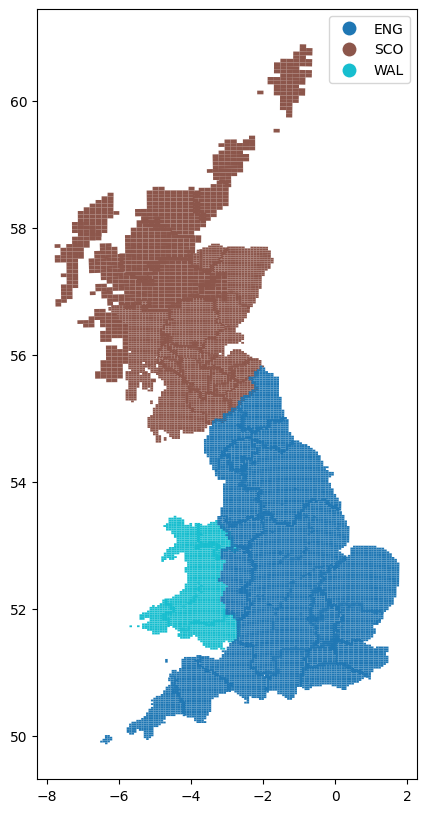

In [29]:
metadata.plot("COUNTRY", figsize=(10,10), legend=True)

<Axes: ylabel='Frequency'>

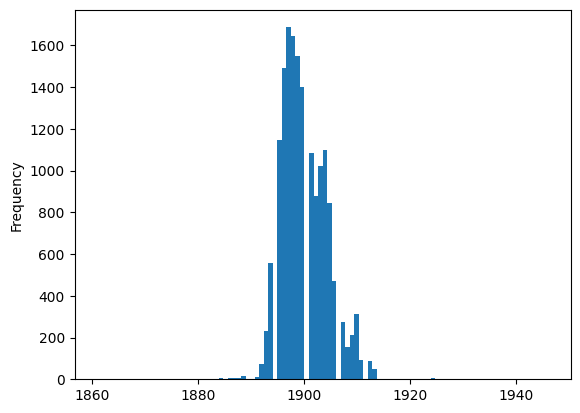

In [8]:
metadata["SURV_END"].replace([0, "0"], None, inplace=True)
metadata["SURV_END"].dropna().astype(int).plot.hist(bins=100)

<Axes: ylabel='Frequency'>

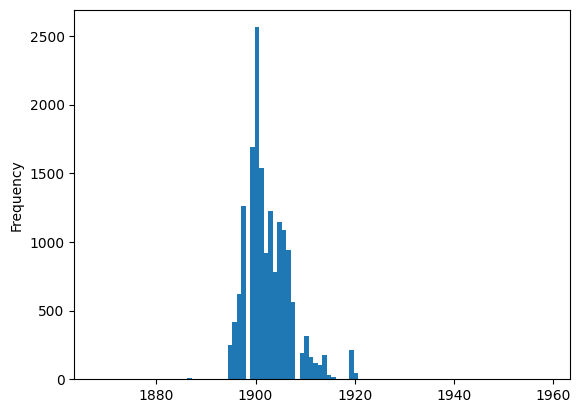

In [9]:
metadata["PUB_END"].replace([0, "0"], None, inplace=True)
metadata["PUB_END"].dropna().astype(int).plot.hist(bins=100)

<Axes: ylabel='Frequency'>

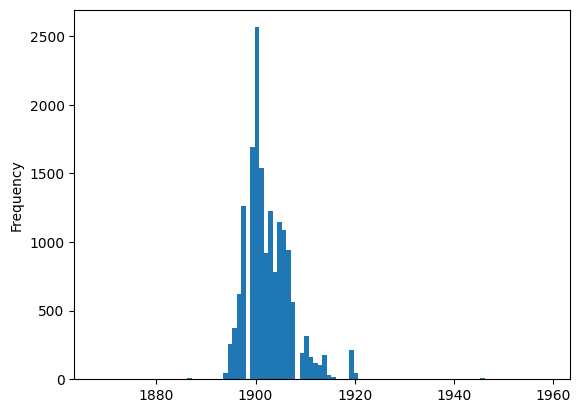

In [11]:
metadata["YEAR"].replace([0, "0"], None, inplace=True)
metadata["YEAR"].dropna().astype(int).plot.hist(bins=100)

<Axes: >

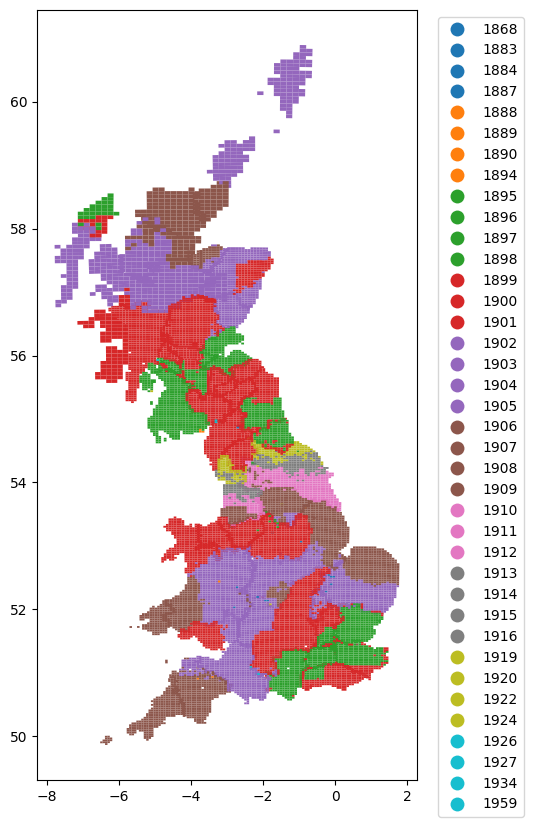

In [26]:
metadata.plot(column="PUB_END", figsize=(10,10), legend=True, legend_kwds={"bbox_to_anchor":(1.3, 1)})

<Axes: >

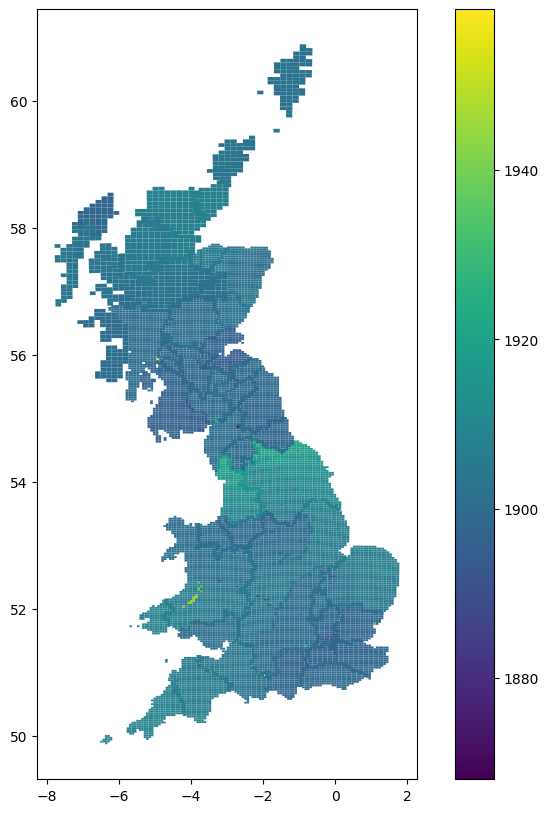

In [16]:
metadata.plot(column="YEAR", figsize=(10,10), legend=True)